In [0]:
from keras.datasets import mnist
import numpy as np

(x_tr, _), (x_te, _) = mnist.load_data()


In [27]:
x_train = x_tr.astype('float32') / 255.
x_test = x_te.astype('float32') / 255.
# flatten data
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


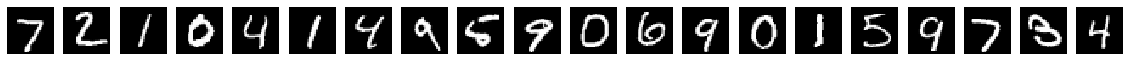

In [28]:
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [132]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32 

input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)

decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)


encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[2]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

print('*'*20,"AUTO ENCODER STRUCTURE",'*'*20)
autoencoder.summary()

print('*'*20,"ENCODER STRUCTURE",'*'*20)
encoder.summary()

print('*'*20,"DECODER STRUCTURE",'*'*20)
decoder.summary()

******************** AUTO ENCODER STRUCTURE ********************
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_71 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_197 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_198 (Dense)            (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
******************** ENCODER STRUCTURE ********************
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_71 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_197 (De

In [122]:
autoencoder.fit(x_train,x_train,epochs=100,
                batch_size=128,
#                 shuffle=True,
                validation_data=(x_test,x_test)
           )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.3143 - val_loss: 0.2546
Epoch 2/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.2335 - val_loss: 0.2121
Epoch 3/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.2007 - val_loss: 0.1890
Epoch 4/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.1833 - val_loss: 0.1754
Epoch 5/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.1713 - val_loss: 0.1648
Epoch 6/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.1616 - val_loss: 0.1559
Epoch 7/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.1536 - val_loss: 0.1485
Epoch 8/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.1469 - val_loss: 0.1425
Epoch 9/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.1412 - val_loss: 0.1

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

******************** ORIGNAL ********************


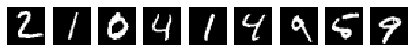

******************** RECONSTRUCTION ********************


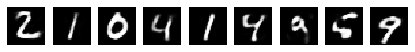

In [131]:
from random import randint
# print(encoded_imgs.shape)
# plt.figure(figsize=(10, 10))
n=10
print("*"*20,'ORIGNAL','*'*20)

for i in range(1,n):
  a1 = plt.subplot(1,n, i)
#   r=randint(0,10000)
  p=plt.imshow(x_test[i].reshape(28,28))
  

  a1.get_xaxis().set_visible(False)
  a1.get_yaxis().set_visible(False)


plt.show()

print("*"*20,'RECONSTRUCTION','*'*20)
for i in range(1,n):
  a1 = plt.subplot(1,n, i)
#   r=randint(0,10000)
  p=plt.imshow(decoded_imgs[i].reshape(28,28))
  

  a1.get_xaxis().set_visible(False)
  a1.get_yaxis().set_visible(False)


plt.show()